In [30]:
import numpy as np
import matplotlib.pyplot as plt
import gzip
import struct
import math

# Daten lib

In [2]:
def load_images(filename):
    with gzip.open(filename, 'rb') as f:
        _, n_images, cols, rows = struct.unpack('>IIII', f.read(16))
        all_pixels = np.frombuffer(f.read(), dtype=np.uint8)
        return all_pixels.reshape(n_images, cols*rows)

def prepend_bias(X):
    return np.insert(X, 0, 1, axis=1)

def load_labels(filename):
    with gzip.open(filename, 'rb') as f:
        f.read(8)
        all_labels = f.read()
        return np.frombuffer(all_labels, dtype=np.uint8).reshape(-1,1)

def encode_fives(Y):
    return (Y==5).astype(int)

Load data

In [6]:
# load data

X_train = prepend_bias(load_images('../data/train-images-idx3-ubyte.gz'))
X_test = prepend_bias(load_images('../data/t10k-images-idx3-ubyte.gz'))

Y_train = encode_fives(load_labels('../data/train-labels-idx1-ubyte.gz'))
Y_test = encode_fives(load_labels('../data/t10k-labels-idx1-ubyte.gz'))

# Explore the data

X_train is training data for the input varibles X. Here, X consists of images of handwritten digits



Explore X the data. For example, find out
- how many images are there in X_train
- how large is each image
- plot an image as a vector, plt.plot(a). What does it look like? Explain!
- reshape the 'images' into a 2D array (hint: its a square)
- plot images

Explore the Y data. For example, find out
- what type of vales are stored in Y
- what's the min and max value
- what do the ones in Y correspond to in X
- what's the shape of the array? Why?


Possible tools
- len(a) returns the legnth of an array or a list
- a.shape (alternatively numpy.shape(a)) returns the shape of an array 
- a[0] returns the first element of a 1d array or the first line of an array (equivalent to a[0,:])
- a.reshape(n,m) returns a reshaped array as a n-by-m array (if possible)
- plt.imshow(a)
- max, min
- iteration: for i in range(start, stop): ... loops over i = start, start+1, ..., stop-1

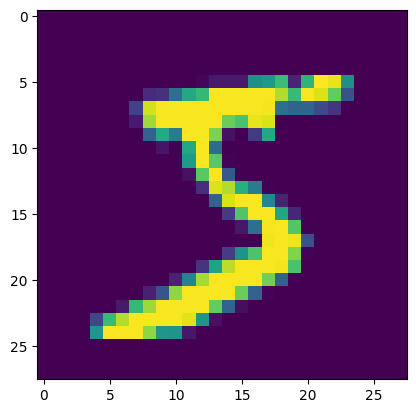

In [17]:
X_train.shape
test = X_train[0][1:].reshape(28,28)
plt.imshow(test)

# Machine learning bib

In [18]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def forward(X, w):
    weighted_sum = np.matmul(X, w)
    return sigmoid(weighted_sum)

def classify(X, w):
    return np.round(forward(X,w))

def loss(X, Y, w):
    y = forward(X,w)
    return -np.average(Y*np.log(y) + (1-Y)*np.log(1-y))

def gradient(X, Y, w):
    return np.matmul(X.T, (forward(X,w)-Y))/X.shape[0]

def train(X, Y, iterations, lr):
    losses = np.zeros(iterations)
    w = np.zeros((X.shape[1], 1))
    for i in range(iterations):
        losses[i] = loss(X,Y,w)
        print('iteration {} => Loss: {}'.format(i, loss(X, Y, w)))
        w -= gradient(X, Y, w) * lr
    return [w, losses]

def test(X, Y, x):
    tot_examples = X.shape[0]
    correct_results = np.sum(classify(X,w) == Y)
    success_rate = correct_results * 100 / tot_examples
    print('\nSuccess: {}/{} ({})'.format(correct_results, tot_examples, success_rate))


# Train and test a classifyer for 5 or not-5

In [31]:
# select a subset for training and testing

first_ind = 0
last_ind = math.floor(len(X_train)/2) # exclusive

X_train_select = X_train[first_ind:last_ind]
Y_train_select = Y_train[first_ind:last_ind]
X_test_select = X_test[first_ind:last_ind]
Y_test_select = Y_test[first_ind:last_ind]


In [32]:
[w, losses] = train(X_train_select, Y_train_select, iterations=100, lr=1e-5)

iteration 0 => Loss: 0.6931471805599453
iteration 1 => Loss: 0.8127380402527672
iteration 2 => Loss: 0.6128442439153153
iteration 3 => Loss: 0.42117615067124425
iteration 4 => Loss: 0.2657698786352035
iteration 5 => Loss: 0.2174495036702442
iteration 6 => Loss: 0.20924839589933894
iteration 7 => Loss: 0.20214860554496228
iteration 8 => Loss: 0.19612548763388551
iteration 9 => Loss: 0.19084806432208995
iteration 10 => Loss: 0.186195860270548
iteration 11 => Loss: 0.18204466353894186
iteration 12 => Loss: 0.1783102521313155
iteration 13 => Loss: 0.17492743796046453
iteration 14 => Loss: 0.17184436865440572
iteration 15 => Loss: 0.16902053085079324
iteration 16 => Loss: 0.16642242081646538
iteration 17 => Loss: 0.16402261779899788
iteration 18 => Loss: 0.16179801470100155
iteration 19 => Loss: 0.1597291209393977
iteration 20 => Loss: 0.15779927922875506
iteration 21 => Loss: 0.15599418922789737
iteration 22 => Loss: 0.1543014835655804
iteration 23 => Loss: 0.152710412804742
iteration 24 =

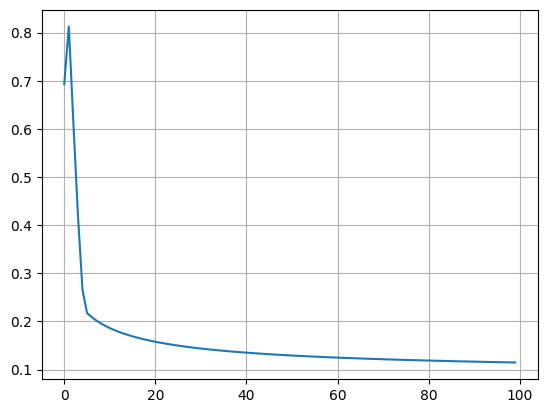

In [33]:
# plot losses over iterations
plt.plot(losses)
plt.grid()

In [22]:
# test accuracy
test(X_test, Y_test, w)


Success: 9637/10000 (96.37)


# Exercises

Experiment with different hyperparameters (hyperparameters are parameters for the training - not model parameters)
- size of the train and test data sets
- number of iterations
- lerning rate

Find out which fives were classified corretly and which were not
- find them (i.e. there indices in the dataset)
- visualize them

Maybe (I did not try!) you can find systematic errors compared to our human classification. For example, select a very small training data set in which all fives are "similar" to humans. Then check if during testing it finds mostly those "similar" to the trained ones. 

A useful strategy is called batching. 
- Divide your training data set in batches (e.g. 6 batches of 10000 each)
- train on first batch and get weights
- START training of second batch with the weights returned by the first batch
- and so on
Compare the success rate to training on the full set. 


In [28]:
[w, losses] = train(X_train_select, Y_train_select, iterations=200, lr=4e-6)

iteration 0 => Loss: 0.6931471805599453
iteration 1 => Loss: 0.3567318414384479
iteration 2 => Loss: 0.31666377963270576
iteration 3 => Loss: 0.2911504634893443
iteration 4 => Loss: 0.2765960861042577
iteration 5 => Loss: 0.26735343458995414
iteration 6 => Loss: 0.2600121742589808
iteration 7 => Loss: 0.25351623264847567
iteration 8 => Loss: 0.24761733215975187
iteration 9 => Loss: 0.24222308078521793
iteration 10 => Loss: 0.23727009871388582
iteration 11 => Loss: 0.2327057970704366
iteration 12 => Loss: 0.22848517546840993
iteration 13 => Loss: 0.2245695521839712
iteration 14 => Loss: 0.22092562729735515
iteration 15 => Loss: 0.21752467988684743
iteration 16 => Loss: 0.21434187270222288
iteration 17 => Loss: 0.21135565655391808
iteration 18 => Loss: 0.20854726576180635
iteration 19 => Loss: 0.2059002940936009
iteration 20 => Loss: 0.20340034002302046
iteration 21 => Loss: 0.20103471061455364
iteration 22 => Loss: 0.19879217440056596
iteration 23 => Loss: 0.1966627548948389
iteration 2

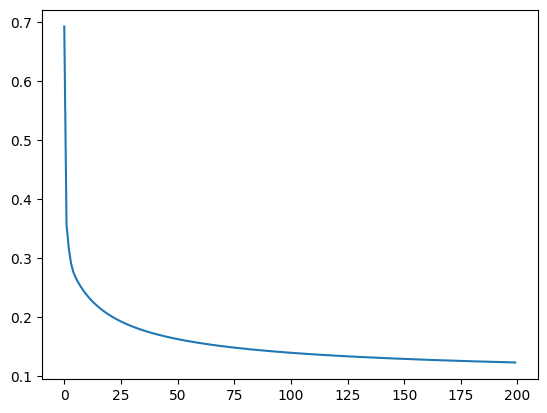

In [29]:
plt.plot(losses)